# Sterling E-Commerce Analysis
The Ecommerce store Is a one-stop online shopping destination for a wide range of high-quality products, they offer a wide selection of products across various categories such as health & sports, men's and women's fashion, computing, entertainment, mobiles & tablets, appliances, beauty & grooming, home & living, soghaat, school & education, books, these comprehensive range of products caters to the needs of diverse customer base.

## Problem Statement
The objective of this analysis is to gain insights into the business and improve efficiency. To understand the customers needs, preferences and behaviours and also identify patterns and trends.

## Data Source
The data was gotten from an e-commerce store sales department. Data is made up of various columns, below are the names and meaning of the columns.
   - Category – The category of goods
   - City – The city where customers are ordering from
   - County – The county where customers are ordering from
   - Cust Id – Customer ID
   - Customer Since – The date when the customer first order.    
   - Date of Order – The date when the customer placed an order.    
   - Full Name – Customer full name   
   - Gender – (Male, Female)
   - Item Id – Item ID
   - Order Id – Order ID
   - Payment Method – The payment platform the customer used
   - Place Name – The exact location where the customer are ordering from
   - Ref Num – Reference Number
   - Region – The region where the customer are ordering from
   - State - The state where the customer are ordering from
   - User Name – The customer’s username
   - Zip – Customer’s zip code
   - Qty Ordered – The quantity of goods ordered
   - Total – Total amount paid by customer


## **Importing neccessary libraries and Data**



In [1]:
import pandas as pd
import numpy as np                   #used for Data preprocessing
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline                   
import missingno as msno             #missing data
sns.set()
import collections as Counter
from subprocess import check_output     #for viewing profile report
import warnings
warnings.filterwarnings("ignore")

In [2]:
# upload the data
df = pd.read_excel(r"C:\Users\Windows\Desktop\DS_Projects\Data sets\Sterling E-Commerce Data.xlsx")

## Data Understanding/Overview

In [3]:
df.head(2)

,Category,City,County,Cust Id,Customer Since,Date of Order,Full Name,Gender,Item Id,Order Id,Payment Method,Place Name,Ref Num,Region,State,User Name,Zip,Qty Ordered,Total
0,Health & Sports,Bode,Humboldt,112285,2008-02-11,2022-08-07,"Renaud, Maudie",F,880913,100547952.0,Easypay_MA,Bode,352808,Midwest,IA,mcrenaud,50519,3,32.0
1,Men's Fashion,Belleville,St. Clair,112386,2005-06-23,2022-08-08,"Shimp, Mariela",F,881493,100548328.0,Easypay_MA,Belleville,310849,Midwest,IL,mgshimp,62223,2,74.8


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283083 entries, 0 to 283082
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Category        283083 non-null  object        
 1   City            283083 non-null  object        
 2   County          283083 non-null  object        
 3   Cust Id         283083 non-null  int64         
 4   Customer Since  283083 non-null  datetime64[ns]
 5   Date of Order   283083 non-null  datetime64[ns]
 6   Full Name       283083 non-null  object        
 7   Gender          283083 non-null  object        
 8   Item Id         283083 non-null  int64         
 9   Order Id        283078 non-null  float64       
 10  Payment Method  283083 non-null  object        
 11  Place Name      283083 non-null  object        
 12  Ref Num         283083 non-null  int64         
 13  Region          283083 non-null  object        
 14  State           283083 non-null  obj

#### Insights: From the information above the dataset is made up of both numerical and categorical data. There are missing data under the order id column.

In [5]:
df.shape

(283083, 19)

#### Insights: The dataset consist of 283,083 rows and 19 columns

In [6]:
df.describe(include= "all").T

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
Category,283083,15,Mobiles & Tablets,60954,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,283083,15668,Dekalb,2525,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
County,283083,2518,Jefferson,3510,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cust Id,283083.0,NaN,NaN,NaN,NaT,NaT,70106.816026,30215.394879,4.0,56640.0,74320.0,92371.0,115326.0
Customer Since,283083,11629,2005-11-30 00:00:00,2536,1978-11-04,2017-07-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date of Order,283083,365,2021-12-20 00:00:00,13522,2021-10-01,2022-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Full Name,283083,63610,"Gonzalez, Joel",2524,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,283083,2,M,144295,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item Id,283083.0,NaN,NaN,NaN,NaT,NaT,741747.110628,95664.609013,574769.0,659898.5,742471.0,826078.5,905208.0
Order Id,283078.0,NaN,NaN,NaN,NaT,NaT,100456970.755559,60909.919565,100354677.0,100404736.0,100451836.5,100513392.0,100562387.0


#### Insights: The statistical summary of the dataset shows that there are 15 unique categories of products with mobiles and tablets having the highest occurence. The products are supplied to different counties over about 49 states in the USA. Some customers have shopped with the store since as far back as November 1978. 

In [7]:
df.columns

Index(['Category', 'City', 'County', 'Cust Id', 'Customer Since',
       'Date of Order', 'Full Name', 'Gender', 'Item Id', 'Order Id',
       'Payment Method', 'Place Name', 'Ref Num', 'Region', 'State',
       'User Name', 'Zip', 'Qty Ordered', 'Total'],
      dtype='object')

In [8]:
df.duplicated().sum()

0

In [9]:
#from pandas_profiling import ProfileReport
#df_profile = ProfileReport(df, title="Sterling E-Commerce Data Profile")
#df_profile

## Data Cleaning
. **Missing Value treatment**
. **Feature Engineering**
. **Outlier detection and treatment**
. **Any other preprocessing steps**




In [10]:
#making a copy of the dataset
df_copy = df.copy()
df_copy.head(2)

,Category,City,County,Cust Id,Customer Since,Date of Order,Full Name,Gender,Item Id,Order Id,Payment Method,Place Name,Ref Num,Region,State,User Name,Zip,Qty Ordered,Total
0,Health & Sports,Bode,Humboldt,112285,2008-02-11,2022-08-07,"Renaud, Maudie",F,880913,100547952.0,Easypay_MA,Bode,352808,Midwest,IA,mcrenaud,50519,3,32.0
1,Men's Fashion,Belleville,St. Clair,112386,2005-06-23,2022-08-08,"Shimp, Mariela",F,881493,100548328.0,Easypay_MA,Belleville,310849,Midwest,IL,mgshimp,62223,2,74.8


In [11]:
#Missing data

df.isnull().sum()



Category          0
City              0
County            0
Cust Id           0
Customer Since    0
Date of Order     0
Full Name         0
Gender            0
Item Id           0
Order Id          5
Payment Method    0
Place Name        0
Ref Num           0
Region            0
State             0
User Name         0
Zip               0
Qty Ordered       0
Total             0
dtype: int64

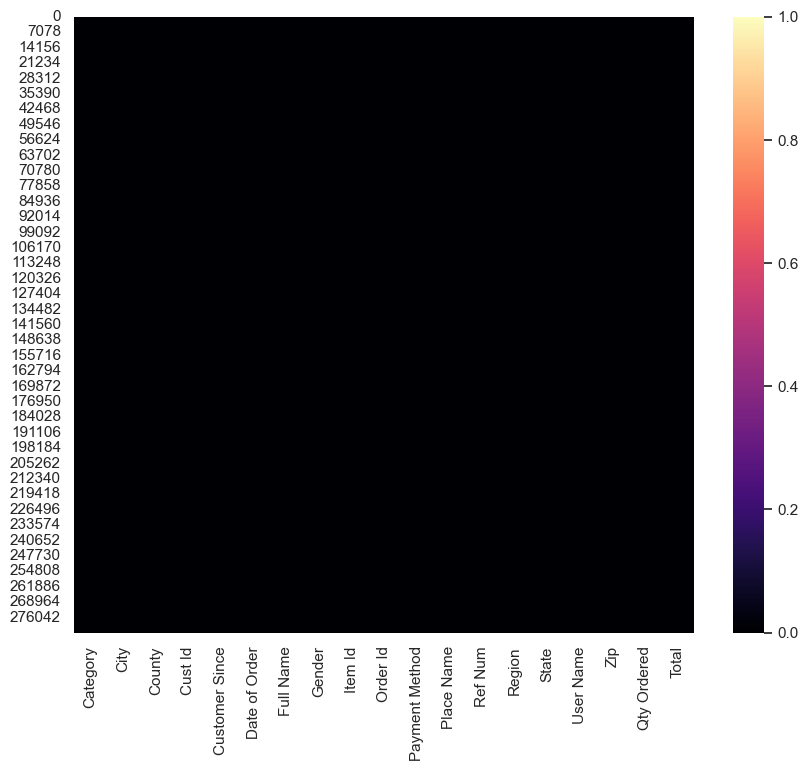

In [12]:
# Checking for missing data
plt.figure(figsize= (10, 8))
sns.heatmap(df.isnull(), cbar=True, cmap='magma');

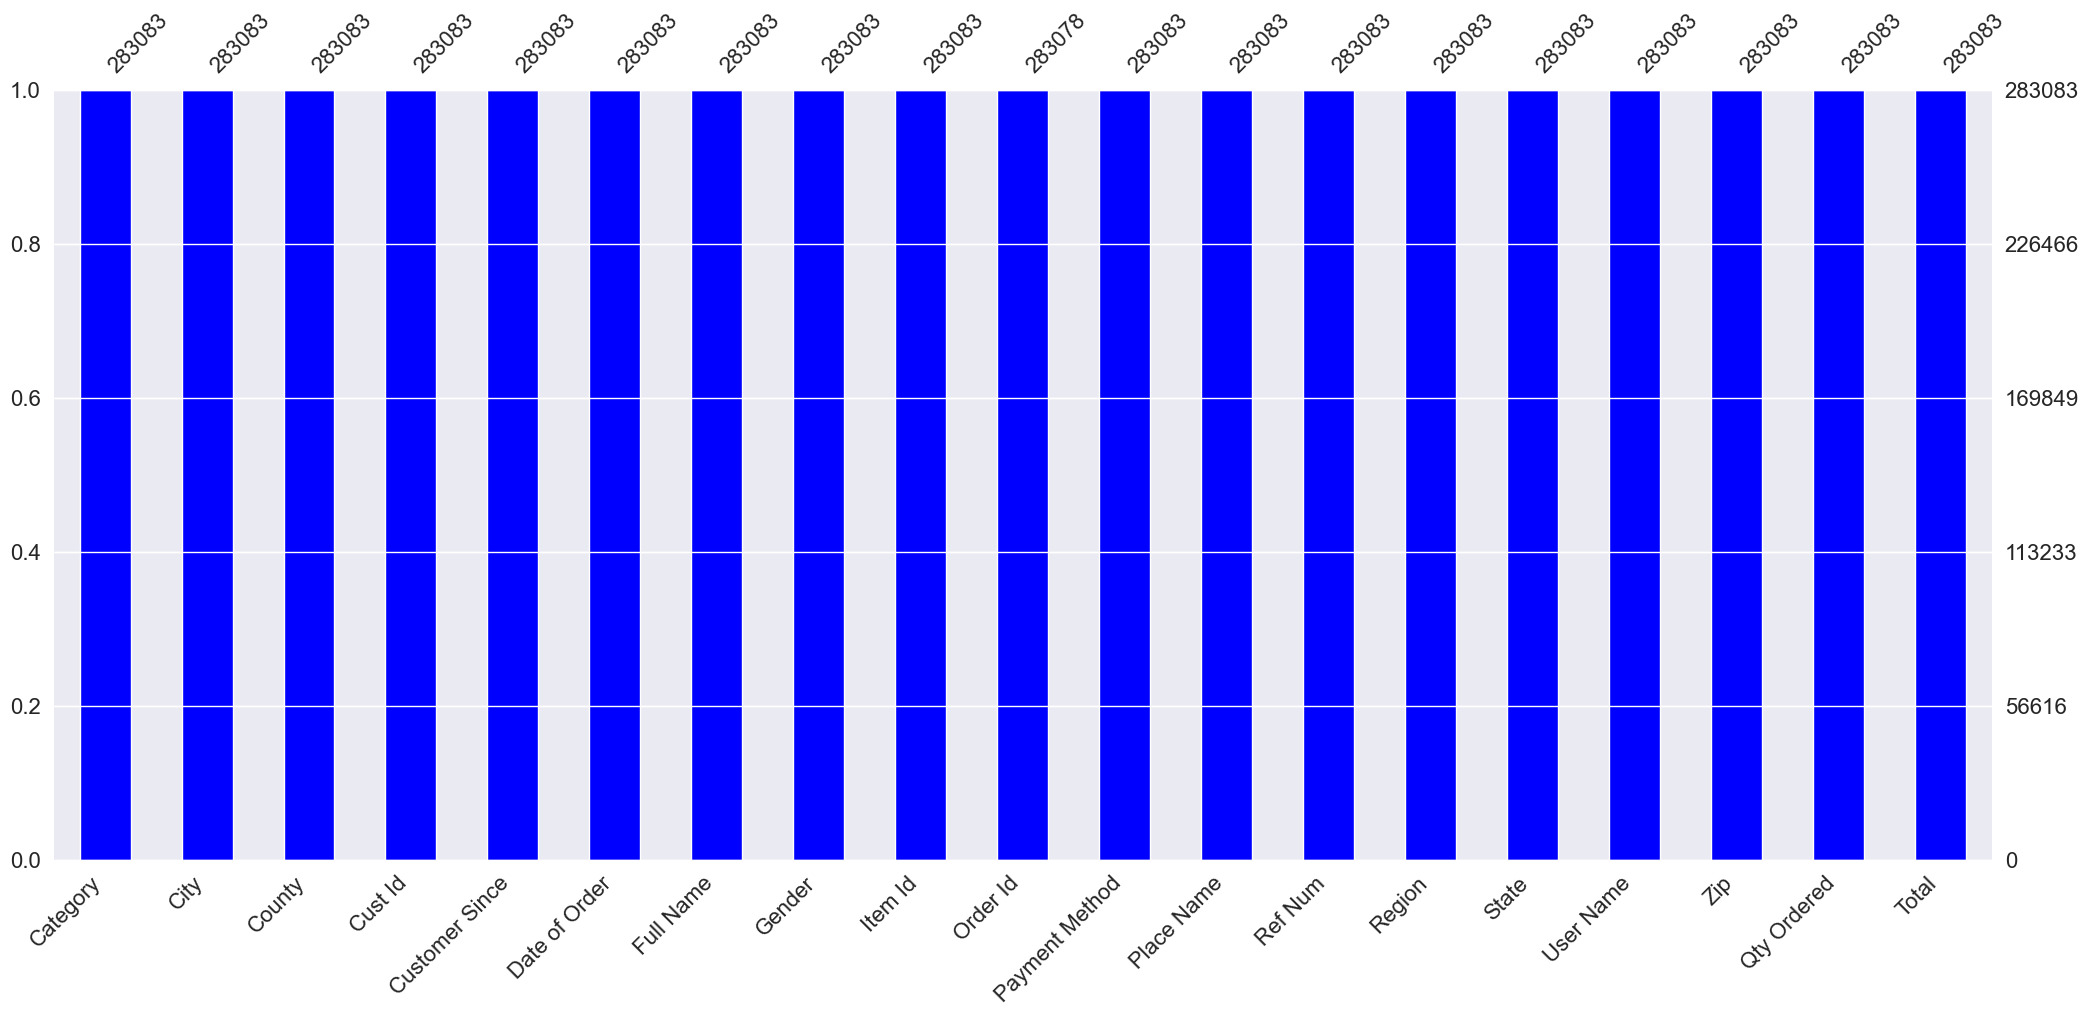

In [13]:
msno.bar(df, color='blue');


In [14]:
df[df.isnull().any(axis=1)]   #checking the table for the missing data

,Category,City,County,Cust Id,Customer Since,Date of Order,Full Name,Gender,Item Id,Order Id,Payment Method,Place Name,Ref Num,Region,State,User Name,Zip,Qty Ordered,Total
38758,Soghaat,Leiters Ford,Fulton,111867,2010-11-04,2022-08-04,"Wright, Man",M,879766,NaN,cod,Leiters Ford,939999,Midwest,IN,mewright,46945,2,36.0
38759,Soghaat,Leiters Ford,Fulton,111867,2010-11-04,2022-08-04,"Wright, Man",M,879765,NaN,cod,Leiters Ford,939999,Midwest,IN,mewright,46945,3,45.0
133217,Mobiles & Tablets,Rock Point,Charles,92075,2014-04-08,2022-04-01,"Torkelson, Berneice",F,767619,NaN,cod,Rock Point,715389,South,MD,bttorkelson,20682,2,2919.9
145889,Mobiles & Tablets,Uniopolis,Auglaize,111166,2017-02-23,2022-07-21,"Cannon, Shamika",F,872703,NaN,cod,Uniopolis,406105,Midwest,OH,svcannon,45888,2,578.9
224999,Computing,Barrington,Camden,40853,2009-08-24,2022-08-12,"Robichaux, Marion",M,883358,NaN,cod,Barrington,986961,Northeast,NJ,mjrobichaux,8007,2,39.9


In [15]:
#Drop the missing data
df.dropna(inplace=True)
df.isnull().sum()


Category          0
City              0
County            0
Cust Id           0
Customer Since    0
Date of Order     0
Full Name         0
Gender            0
Item Id           0
Order Id          0
Payment Method    0
Place Name        0
Ref Num           0
Region            0
State             0
User Name         0
Zip               0
Qty Ordered       0
Total             0
dtype: int64

In [16]:
df.head(2)

,Category,City,County,Cust Id,Customer Since,Date of Order,Full Name,Gender,Item Id,Order Id,Payment Method,Place Name,Ref Num,Region,State,User Name,Zip,Qty Ordered,Total
0,Health & Sports,Bode,Humboldt,112285,2008-02-11,2022-08-07,"Renaud, Maudie",F,880913,100547952.0,Easypay_MA,Bode,352808,Midwest,IA,mcrenaud,50519,3,32.0
1,Men's Fashion,Belleville,St. Clair,112386,2005-06-23,2022-08-08,"Shimp, Mariela",F,881493,100548328.0,Easypay_MA,Belleville,310849,Midwest,IL,mgshimp,62223,2,74.8


In [17]:
# Drop all unique values..that is values that have identification numbers unique to it,,,Check city and place name
df.columns

Index(['Category', 'City', 'County', 'Cust Id', 'Customer Since',
       'Date of Order', 'Full Name', 'Gender', 'Item Id', 'Order Id',
       'Payment Method', 'Place Name', 'Ref Num', 'Region', 'State',
       'User Name', 'Zip', 'Qty Ordered', 'Total'],
      dtype='object')

In [18]:
df.drop(df.columns[[3,8,9]], axis=1, inplace=True)

In [19]:
df.columns

Index(['Category', 'City', 'County', 'Customer Since', 'Date of Order',
       'Full Name', 'Gender', 'Payment Method', 'Place Name', 'Ref Num',
       'Region', 'State', 'User Name', 'Zip', 'Qty Ordered', 'Total'],
      dtype='object')

In [20]:
#To extract the year, month , quarter
#Time of Order
df["Month_of_Order"] = df["Date of Order"].dt.month
df["Month_Name"] = df["Date of Order"].dt.month_name()
df["quarter_of_order"] = df["Date of Order"].dt.quarter
df["year_of_order"] = df["Date of Order"].dt.year

df.head(2)


,Category,City,County,Customer Since,Date of Order,Full Name,Gender,Payment Method,Place Name,Ref Num,Region,State,User Name,Zip,Qty Ordered,Total,Month_of_Order,Month_Name,quarter_of_order,year_of_order
0,Health & Sports,Bode,Humboldt,2008-02-11,2022-08-07,"Renaud, Maudie",F,Easypay_MA,Bode,352808,Midwest,IA,mcrenaud,50519,3,32.0,8,August,3,2022
1,Men's Fashion,Belleville,St. Clair,2005-06-23,2022-08-08,"Shimp, Mariela",F,Easypay_MA,Belleville,310849,Midwest,IL,mgshimp,62223,2,74.8,8,August,3,2022


In [21]:
#When Customer started patronising the company
df["Year_of_signup"] = df["Customer Since"].dt.year
df.head()

,Category,City,County,Customer Since,Date of Order,Full Name,Gender,Payment Method,Place Name,Ref Num,...,State,User Name,Zip,Qty Ordered,Total,Month_of_Order,Month_Name,quarter_of_order,year_of_order,Year_of_signup
0,Health & Sports,Bode,Humboldt,2008-02-11,2022-08-07,"Renaud, Maudie",F,Easypay_MA,Bode,352808,...,IA,mcrenaud,50519,3,32.0,8,August,3,2022,2008
1,Men's Fashion,Belleville,St. Clair,2005-06-23,2022-08-08,"Shimp, Mariela",F,Easypay_MA,Belleville,310849,...,IL,mgshimp,62223,2,74.8,8,August,3,2022,2005
2,Men's Fashion,Belleville,St. Clair,2005-06-23,2022-08-08,"Shimp, Mariela",F,Easypay_MA,Belleville,310849,...,IL,mgshimp,62223,2,74.9,8,August,3,2022,2005
3,Computing,Young America,Carver,2013-09-15,2022-08-18,"Doiron, Latrina",F,Payaxis,Young America,578056,...,MN,lmdoiron,55552,2,6822.9,8,August,3,2022,2013
4,Entertainment,Young America,Carver,2013-09-15,2022-08-20,"Doiron, Latrina",F,Payaxis,Young America,578056,...,MN,lmdoiron,55552,2,2849.9,8,August,3,2022,2013


In [22]:
#Defining the customer loyalty
def Customer_Loyalty(Year_of_signup):
    if Year_of_signup <= 1988:
        return "<=1988 Advanced"
    elif Year_of_signup <= 1998:
        return "1989-1998 Old"
    elif Year_of_signup <= 2008 :
        return "1999-2008 Intermediate"
    else:
        return ">2008 Newbie"
       
df["Customer_loyalty_label"] = df["Year_of_signup"].apply(Customer_Loyalty);
        
df.head()    

,Category,City,County,Customer Since,Date of Order,Full Name,Gender,Payment Method,Place Name,Ref Num,...,User Name,Zip,Qty Ordered,Total,Month_of_Order,Month_Name,quarter_of_order,year_of_order,Year_of_signup,Customer_loyalty_label
0,Health & Sports,Bode,Humboldt,2008-02-11,2022-08-07,"Renaud, Maudie",F,Easypay_MA,Bode,352808,...,mcrenaud,50519,3,32.0,8,August,3,2022,2008,1999-2008 Intermediate
1,Men's Fashion,Belleville,St. Clair,2005-06-23,2022-08-08,"Shimp, Mariela",F,Easypay_MA,Belleville,310849,...,mgshimp,62223,2,74.8,8,August,3,2022,2005,1999-2008 Intermediate
2,Men's Fashion,Belleville,St. Clair,2005-06-23,2022-08-08,"Shimp, Mariela",F,Easypay_MA,Belleville,310849,...,mgshimp,62223,2,74.9,8,August,3,2022,2005,1999-2008 Intermediate
3,Computing,Young America,Carver,2013-09-15,2022-08-18,"Doiron, Latrina",F,Payaxis,Young America,578056,...,lmdoiron,55552,2,6822.9,8,August,3,2022,2013,>2008 Newbie
4,Entertainment,Young America,Carver,2013-09-15,2022-08-20,"Doiron, Latrina",F,Payaxis,Young America,578056,...,lmdoiron,55552,2,2849.9,8,August,3,2022,2013,>2008 Newbie


In [23]:
#Defining the month to season conversion function

def month_to_season(Month_of_Order):
    if Month_of_Order in [12, 1, 2]:
        return "Winter"
    elif Month_of_Order in [3, 4, 5]:
        return "Spring"
    elif Month_of_Order in [6, 7, 8]:
        return "Summer"
    elif Month_of_Order in [9, 10,11]:
        return "Autumn"
    else:
        return "Invalid Month"
df["Season_label"] = df["Month_of_Order"].apply(month_to_season);





In [24]:
df.head(2)

,Category,City,County,Customer Since,Date of Order,Full Name,Gender,Payment Method,Place Name,Ref Num,...,Zip,Qty Ordered,Total,Month_of_Order,Month_Name,quarter_of_order,year_of_order,Year_of_signup,Customer_loyalty_label,Season_label
0,Health & Sports,Bode,Humboldt,2008-02-11,2022-08-07,"Renaud, Maudie",F,Easypay_MA,Bode,352808,...,50519,3,32.0,8,August,3,2022,2008,1999-2008 Intermediate,Summer
1,Men's Fashion,Belleville,St. Clair,2005-06-23,2022-08-08,"Shimp, Mariela",F,Easypay_MA,Belleville,310849,...,62223,2,74.8,8,August,3,2022,2005,1999-2008 Intermediate,Summer


In [25]:

df["Unit_price"] = df["Total"]/df["Qty Ordered"]

df.head()

,Category,City,County,Customer Since,Date of Order,Full Name,Gender,Payment Method,Place Name,Ref Num,...,Qty Ordered,Total,Month_of_Order,Month_Name,quarter_of_order,year_of_order,Year_of_signup,Customer_loyalty_label,Season_label,Unit_price
0,Health & Sports,Bode,Humboldt,2008-02-11,2022-08-07,"Renaud, Maudie",F,Easypay_MA,Bode,352808,...,3,32.0,8,August,3,2022,2008,1999-2008 Intermediate,Summer,10.666667
1,Men's Fashion,Belleville,St. Clair,2005-06-23,2022-08-08,"Shimp, Mariela",F,Easypay_MA,Belleville,310849,...,2,74.8,8,August,3,2022,2005,1999-2008 Intermediate,Summer,37.400000
2,Men's Fashion,Belleville,St. Clair,2005-06-23,2022-08-08,"Shimp, Mariela",F,Easypay_MA,Belleville,310849,...,2,74.9,8,August,3,2022,2005,1999-2008 Intermediate,Summer,37.450000
3,Computing,Young America,Carver,2013-09-15,2022-08-18,"Doiron, Latrina",F,Payaxis,Young America,578056,...,2,6822.9,8,August,3,2022,2013,>2008 Newbie,Summer,3411.450000
4,Entertainment,Young America,Carver,2013-09-15,2022-08-20,"Doiron, Latrina",F,Payaxis,Young America,578056,...,2,2849.9,8,August,3,2022,2013,>2008 Newbie,Summer,1424.950000


In [26]:
df.shape

(283078, 24)

In [27]:
df.columns

Index(['Category', 'City', 'County', 'Customer Since', 'Date of Order',
       'Full Name', 'Gender', 'Payment Method', 'Place Name', 'Ref Num',
       'Region', 'State', 'User Name', 'Zip', 'Qty Ordered', 'Total',
       'Month_of_Order', 'Month_Name', 'quarter_of_order', 'year_of_order',
       'Year_of_signup', 'Customer_loyalty_label', 'Season_label',
       'Unit_price'],
      dtype='object')

In [28]:
df.columns = ['Category', 'City', 'County', 'Customer Since', 'Date of Order',
       'Full Name', 'Gender', 'Payment Method', 'Place Name', 'Ref Num',
       'Region', 'State', 'User Name', 'Zip', 'Qty Ordered', 'Total',
       'Month_of_Order', 'Month_Name', 'quarter_of_order', 'year_of_order',
       'Year_of_signup', 'Customer_loyalty_label', 'Season_label',
       'unit_price']
df.head(2)

,Category,City,County,Customer Since,Date of Order,Full Name,Gender,Payment Method,Place Name,Ref Num,...,Qty Ordered,Total,Month_of_Order,Month_Name,quarter_of_order,year_of_order,Year_of_signup,Customer_loyalty_label,Season_label,unit_price
0,Health & Sports,Bode,Humboldt,2008-02-11,2022-08-07,"Renaud, Maudie",F,Easypay_MA,Bode,352808,...,3,32.0,8,August,3,2022,2008,1999-2008 Intermediate,Summer,10.666667
1,Men's Fashion,Belleville,St. Clair,2005-06-23,2022-08-08,"Shimp, Mariela",F,Easypay_MA,Belleville,310849,...,2,74.8,8,August,3,2022,2005,1999-2008 Intermediate,Summer,37.400000


## **CATEGORICAL VISUALISATION**


### **UNIVARIATE ANALYSIS/BIVARIATE ANALYSIS
#### **Frequency of purchase of the categories**

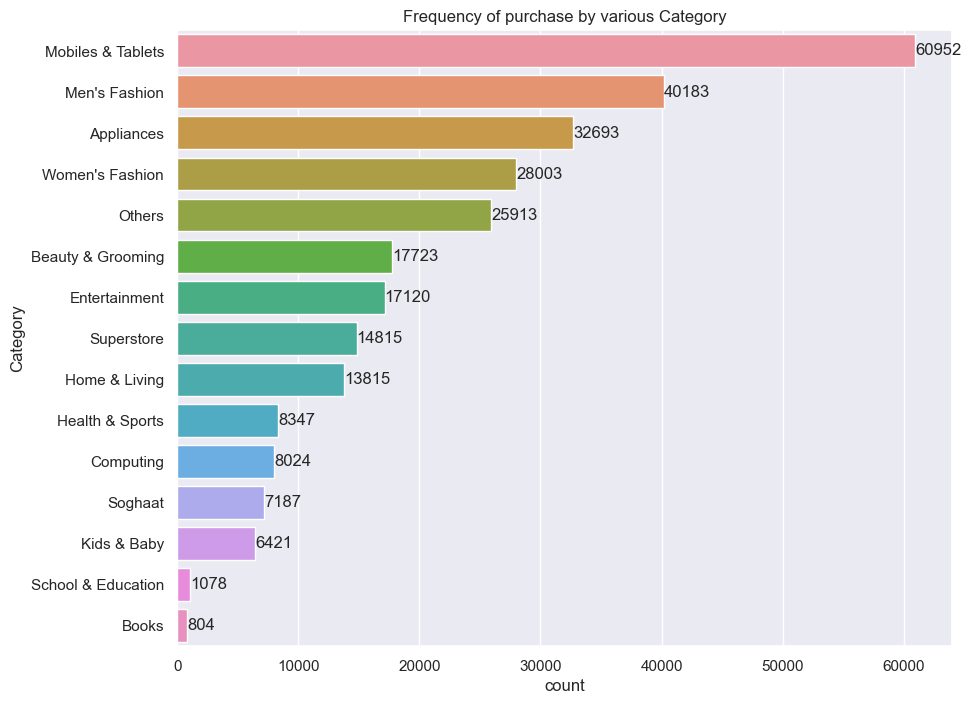

In [29]:
#Frequency of purchase by various category
plt.figure(figsize=(10,8))
ax = sns.countplot(data=df, y="Category", order=df["Category"].value_counts(ascending=False).index)

values = df["Category"].value_counts
ax.bar_label(container=ax.containers[0], label=values, label_type="edge")
plt.title("Frequency of purchase by various Category")
plt.show()

In [30]:
df["Category"].value_counts()

Mobiles & Tablets     60952
Men's Fashion         40183
Appliances            32693
Women's Fashion       28003
Others                25913
Beauty & Grooming     17723
Entertainment         17120
Superstore            14815
Home & Living         13815
Health & Sports        8347
Computing              8024
Soghaat                7187
Kids & Baby            6421
School & Education     1078
Books                   804
Name: Category, dtype: int64

In [31]:
df["Category"].value_counts().sum()

283078

#### Insights: The category the recoreded the highest order was mobiles and tablets, with over 60,000 orders, which is about 21% of company's entire orders, while books category had the least order of about 0.28%.

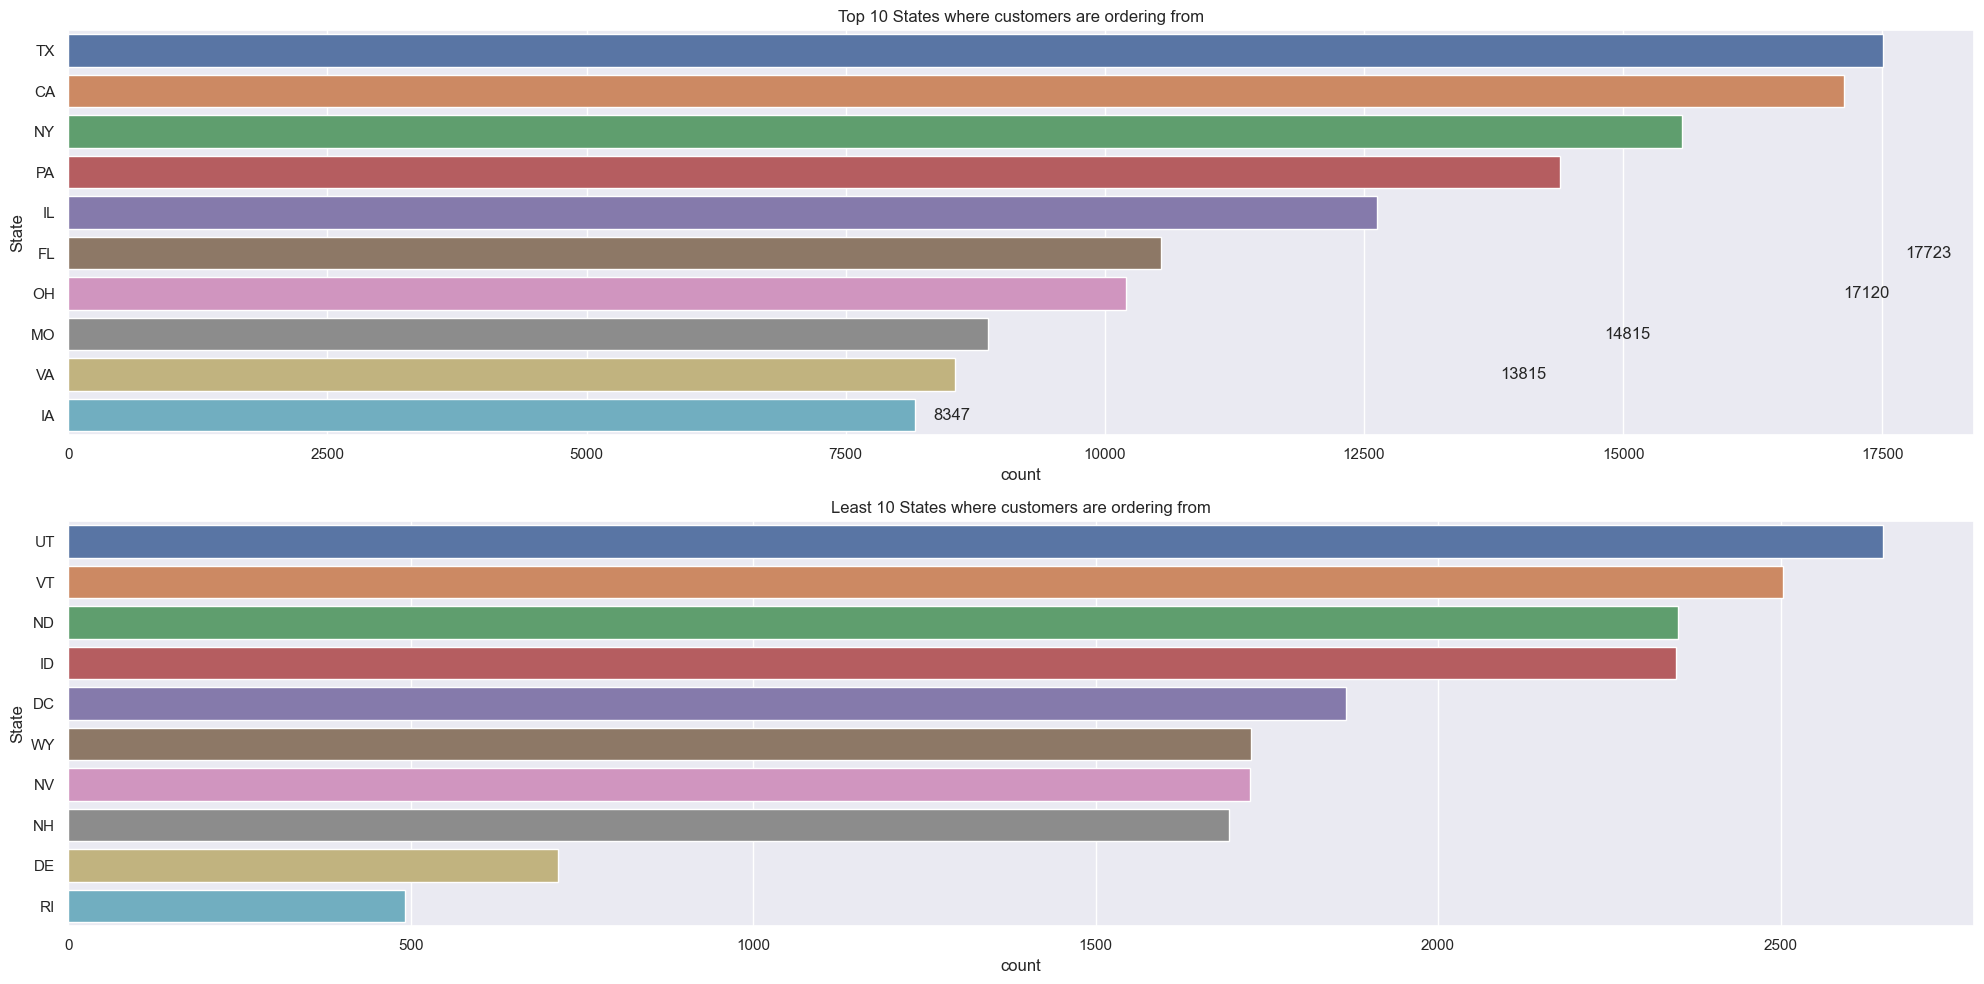

In [32]:
#Top 10 States and least 10 states where customers are ordering from
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(20,10))


sns.countplot(data=df, y="State",ax=axs[0], order=df["State"].value_counts(ascending=False).head(10).index)
axs[0].set_title("Top 10 States where customers are ordering from")
values = df["State"].value_counts
axs[0].bar_label(container=ax.containers[0], label=values, label_type="edge")


sns.countplot(data=df, y="State",ax=axs[1], order=df["State"].value_counts(ascending=False).tail(10).index)
axs[1].set_title("Least 10 States where customers are ordering from") 
values = df["State"].value_counts
axs[1].bar_label(container=ax.containers[0], label=values, label_type="edge")

plt.tight_layout()

plt.show()

In [33]:
# Top 10 and bottom 10 state count
H=df["State"].value_counts().head(10)
T=df["State"].value_counts().tail(10)

print(H)
print(T)

TX    17510
CA    17130
NY    15567
PA    14394
IL    12628
FL    10538
OH    10203
MO     8876
VA     8557
IA     8170
Name: State, dtype: int64
UT    2650
VT    2504
ND    2350
ID    2348
DC    1865
WY    1727
NV    1725
NH    1695
DE     715
RI     492
Name: State, dtype: int64


In [34]:
#Total number of states where orders come from
List= df["State"].drop_duplicates(keep="first", inplace=False).shape
List

(49,)

In [35]:
#
H.sum()

123573

#### Insights: Texas, California,and  New York are the states with the highest Customer Orders, while the states with the least orders include Rhode Island, Delaware and New Hampshire state. The top 10 states make up approximately 44% of the entire orders coming from 49 states,

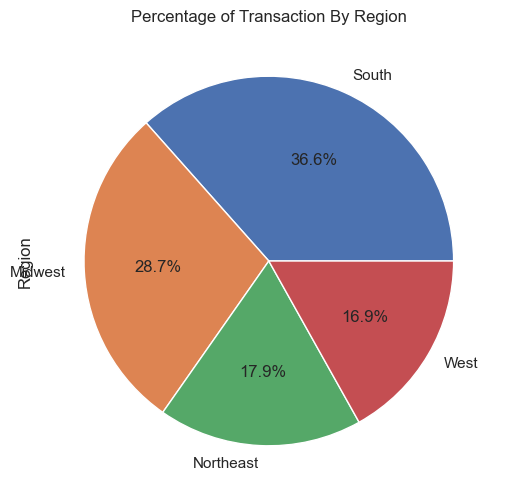

In [36]:
# Total Transaction by Region
fig, ax =plt.subplots(figsize=(6,6))
df["Region"].value_counts().plot.pie(autopct = "%2.1f%%")
ax.set_title("Percentage of Transaction By Region");


#### Insights: Percentage of transaction from the south is about 36.6%, followed by Midwest 26.7%, while the least is from the West 16.9% 

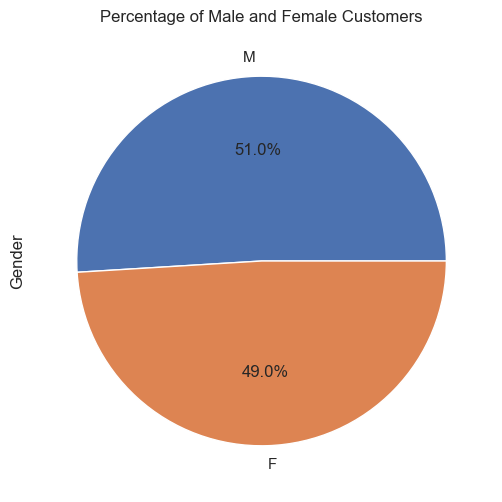

In [37]:
#Percentage of Male and Female Customers
plt.figure(figsize=(6, 6))
df["Gender"].value_counts().plot.pie(autopct = "%2.1f%%")
plt.title("Percentage of Male and Female Customers")
plt.show()

#### Insights: The disparity between the female and male customers is not much, with 48% of them being Female and 51% of them being male

In [38]:
df.columns

Index(['Category', 'City', 'County', 'Customer Since', 'Date of Order',
       'Full Name', 'Gender', 'Payment Method', 'Place Name', 'Ref Num',
       'Region', 'State', 'User Name', 'Zip', 'Qty Ordered', 'Total',
       'Month_of_Order', 'Month_Name', 'quarter_of_order', 'year_of_order',
       'Year_of_signup', 'Customer_loyalty_label', 'Season_label',
       'unit_price'],
      dtype='object')

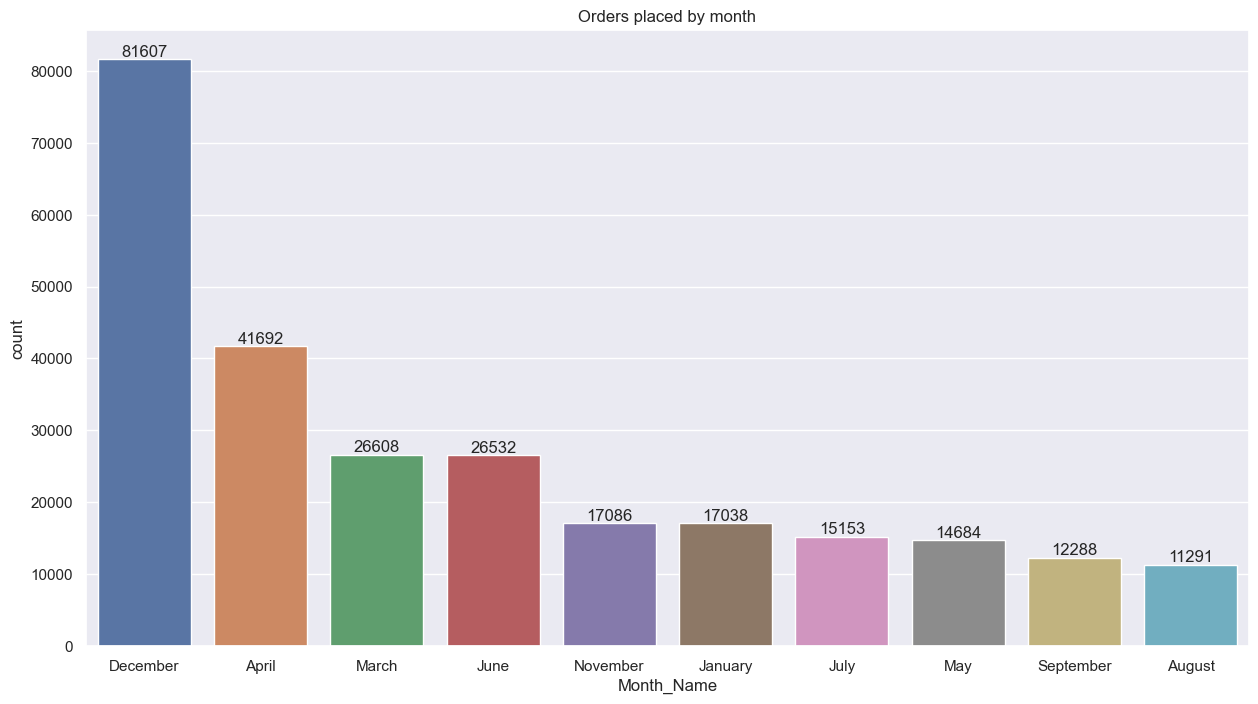

In [39]:
#Frequency of purchase by month
plt.figure(figsize=(15,8))
ax = sns.countplot(data=df, x="Month_Name", order=df["Month_Name"].value_counts(ascending=False).head(10).index)
plt.title("Orders placed by month")

values = df["Month_Name"].value_counts
ax.bar_label(container=ax.containers[0], label=values, label_type="edge")
plt.show()


#### Insights: The company recorded its highest frequency of order in the month of December of over 81,000, followed by the month of April which recorded over 41,000 and least month is October. The great disparity in the frequency of order between December and other months may be due to the Christmas Celebration which comes up in the month of December

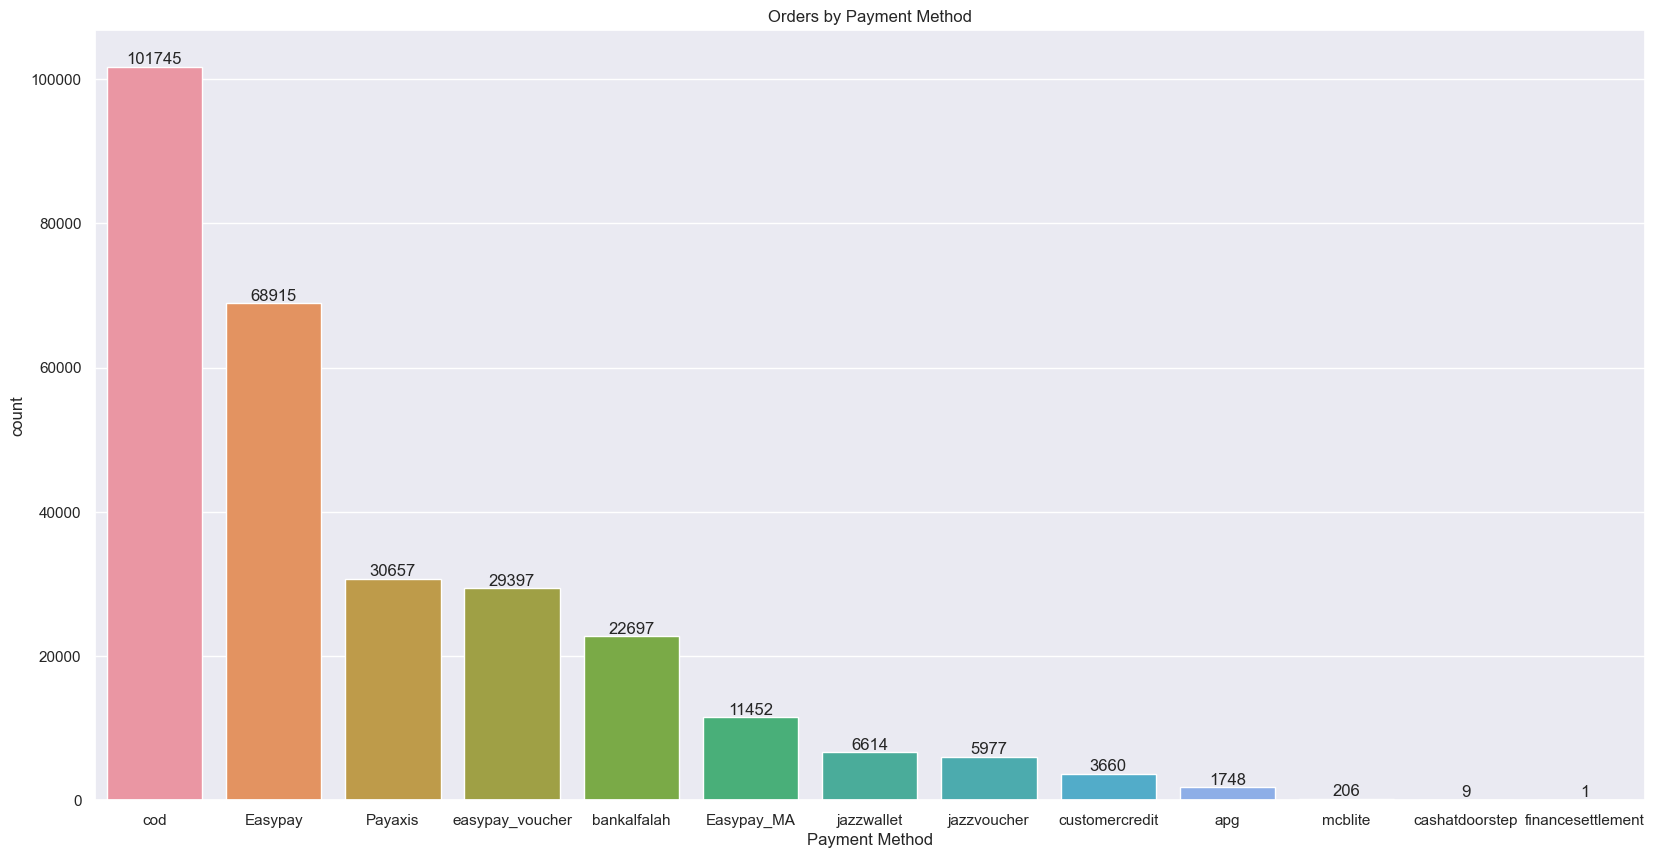

In [40]:
#Frequency of Payment method
plt.figure(figsize=(20,10))
ax = sns.countplot(data=df, x="Payment Method", order=df["Payment Method"].value_counts(ascending=False).index)
plt.title("Orders by Payment Method")

values = df["Payment Method"].value_counts
ax.bar_label(container=ax.containers[0], label=values, label_type="edge")
plt.show()

In [41]:
df["Payment Method"].value_counts().sum()

283078

#### Insights: Over one-third of the payment method comes from Cash on delivery, and only a very few of the customers  use cash at doorstep and financial settlement method

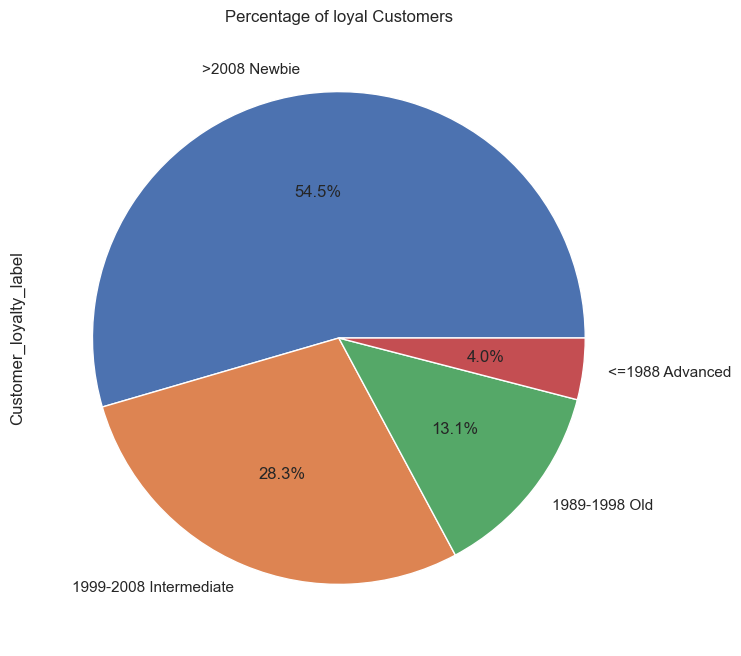

In [42]:
#Percentage of loyal Customers
plt.figure(figsize=(15, 8))
df["Customer_loyalty_label"].value_counts().plot.pie(autopct = "%2.1f%%")
plt.title("Percentage of loyal Customers")
plt.show()

#### Insights: Over 50% of the customers(newbie) started shopping with the company about 10years ago, while only less than 5% of the customers still place orders from the company for the pass 39years

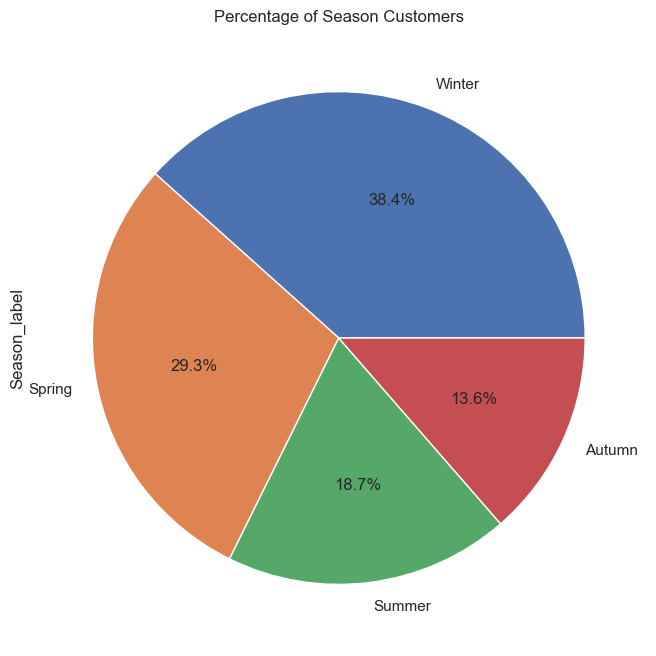

In [43]:
#Percentage of Male and Female Customers
plt.figure(figsize=(15, 8))
df["Season_label"].value_counts().plot.pie(autopct = "%2.1f%%")
plt.title("Percentage of Season Customers")
plt.show()

#### Insights: Winter Season records the highest customers, about 38.4% followed by Spring, this correlated with the high orders seen in the month of December.

In [44]:
df.columns

Index(['Category', 'City', 'County', 'Customer Since', 'Date of Order',
       'Full Name', 'Gender', 'Payment Method', 'Place Name', 'Ref Num',
       'Region', 'State', 'User Name', 'Zip', 'Qty Ordered', 'Total',
       'Month_of_Order', 'Month_Name', 'quarter_of_order', 'year_of_order',
       'Year_of_signup', 'Customer_loyalty_label', 'Season_label',
       'unit_price'],
      dtype='object')

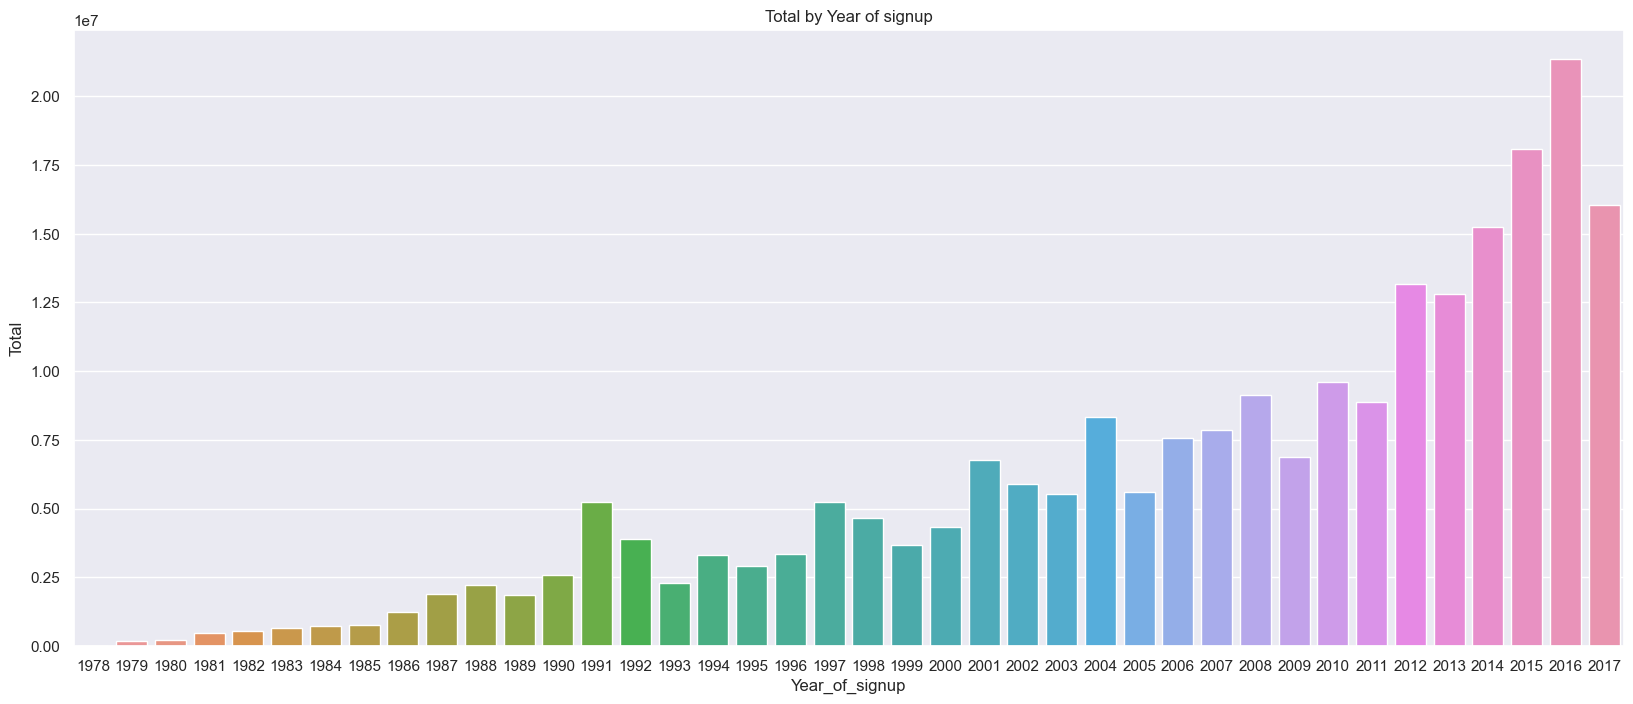

In [45]:
# sum of total by the year of signup
plt.figure(figsize=(20,8))
year_tot = df.groupby("Year_of_signup")["Total"].sum().reset_index()
sns.barplot(data=year_tot, x="Year_of_signup", y="Total").set_title("Total by Year of signup");

#### Insights:  2016 and 2015 year of signup, recorded the highest total amount generated by the company.

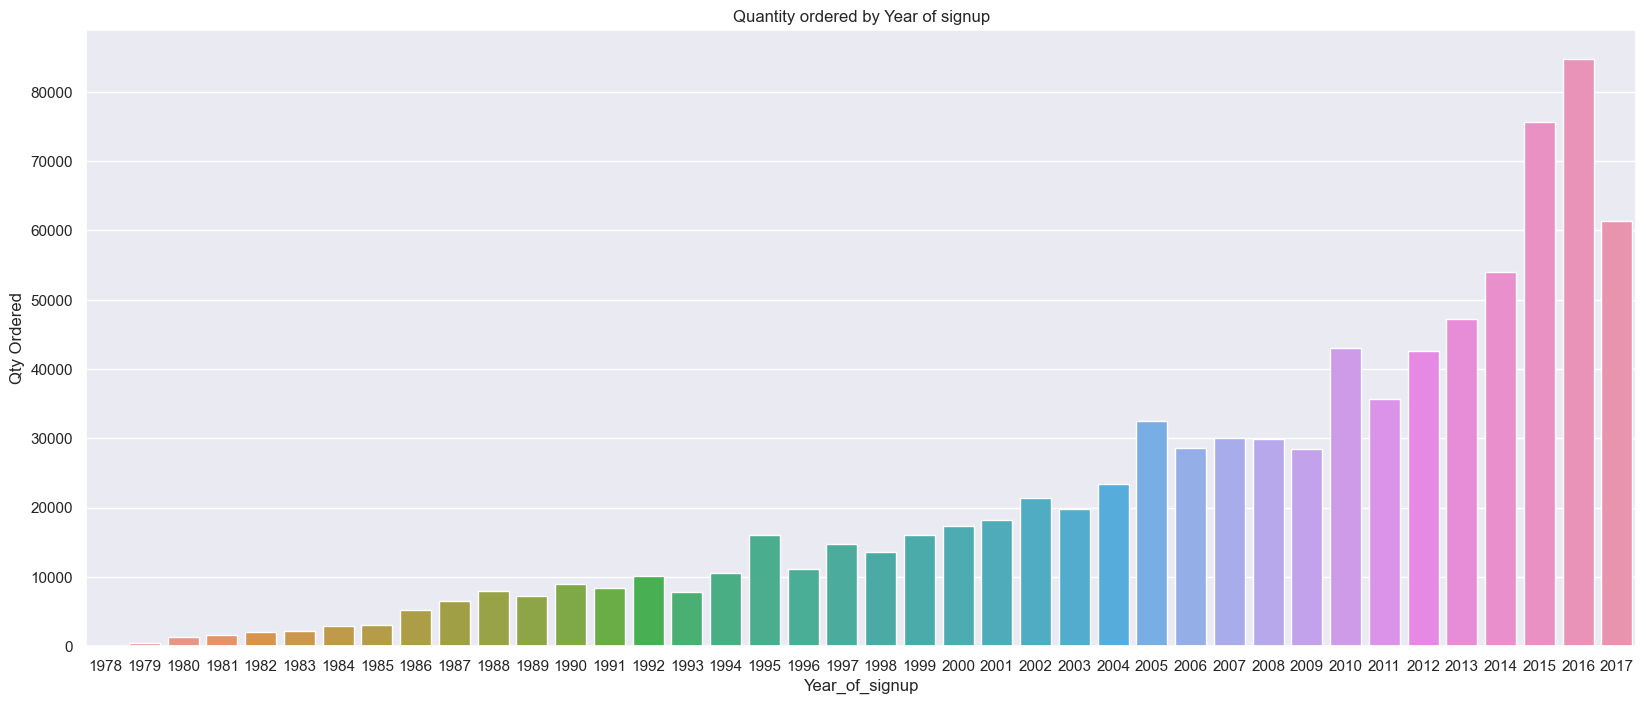

In [46]:
# Sum of quantity by year of sign up
plt.figure(figsize=(20,8))
year_tot = df.groupby("Year_of_signup")["Qty Ordered"].sum().reset_index()
sns.barplot(data=year_tot, x="Year_of_signup", y="Qty Ordered").set_title("Quantity ordered by Year of signup");


#### Insights: 2016 and 2015 also recorded the year with the highest quantity of items bought by customer

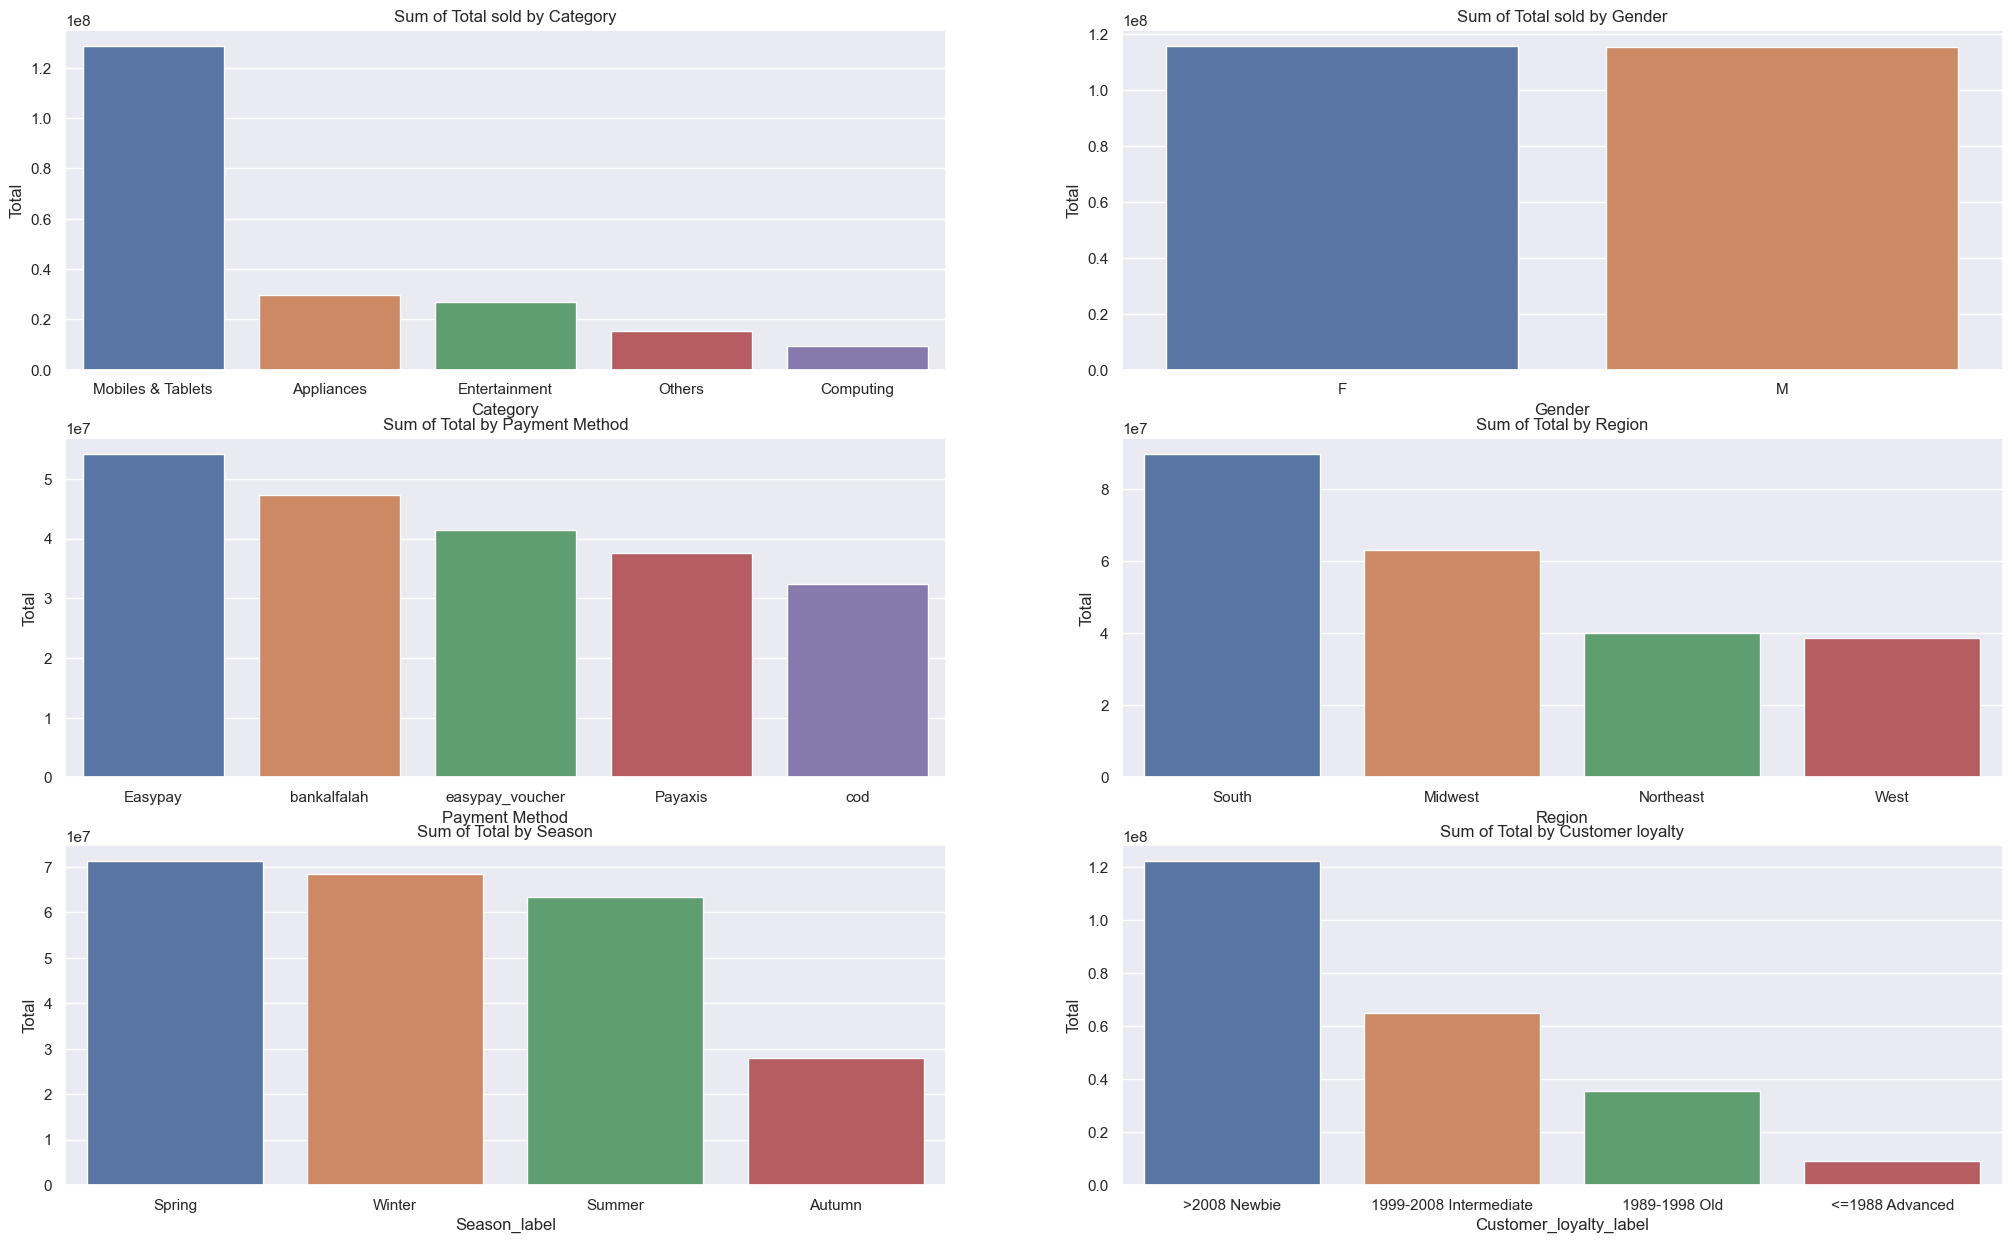

In [47]:
# Subplots of some features and total
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(25,15))

cat_tot = df.groupby("Category")["Total"].sum().sort_values(ascending=False).head(5).reset_index()
sns.barplot(data=cat_tot, x="Category", y="Total", ax=axs[0,0])
axs[0,0].set_title("Sum of Total sold by Category")

gen_tot = df.groupby("Gender")["Total"].sum().sort_values(ascending=False).reset_index()
sns.barplot(data=gen_tot, x="Gender", y="Total", ax=axs[0,1])
axs[0,1].set_title("Sum of Total sold by Gender");

pay_tot = df.groupby("Payment Method")["Total"].sum().sort_values(ascending=False).head(5).reset_index()
sns.barplot(data=pay_tot, x="Payment Method", y="Total", ax=axs[1,0])
axs[1,0].set_title("Sum of Total by Payment Method");

stat_tot = df.groupby("Region")["Total"].sum().sort_values(ascending=False).reset_index()
sns.barplot(data=stat_tot, x="Region", y="Total", ax=axs[1,1])
axs[1,1].set_title("Sum of Total by Region");

sea_tot = df.groupby("Season_label")["Total"].sum().sort_values(ascending=False).reset_index()
sns.barplot(data=sea_tot, x="Season_label", y="Total", ax=axs[2,0])
axs[2,0].set_title("Sum of Total by Season");

cust_tot = df.groupby("Customer_loyalty_label")["Total"].sum().sort_values(ascending=False).reset_index()
sns.barplot(data=cust_tot, x="Customer_loyalty_label", y="Total", ax=axs[2,1])
axs[2,1].set_title("Sum of Total by Customer loyalty");

plt.show()

#### Insights:
#### Mobile phones and tablets accounts for almost 80% of the total amount generated in the data set; this is despite significant quantity purchases in other categories such as; Applicances, Beauty and Grooming, Superstore, Mens fashion and others. The ratio of items purchased to total amount generated in each category should be analysed. For example the Superstore category has an adequate quantity purchase of almost 100,000 however the amount generated from these purchases is less than 20,000 dollars. Since there is disparity in terms of quantity purchased and value generated, Sterling E-commerce should seek efficent means in generating value from other categories, for example black friday sales, promos, holiday theme sales e.t.c

#### Customer who order via easypay-vouchers do not contribute to quantity ordered, however the total amount generated from this payment method is highly significant. While the opposite applies to the COD method of payment; high contribution in terms of quantity but not in terms of total amount generated. This payment methods can be used to analyse the purchasing power of the type of customers who use such payment methods.

#### The dataset shows that during the winter period, the quantity order is high however the amount generated was low for that season. Sterling E-commence need to investigate why there is a disparity between quantity ordered and revenue generated in winter.


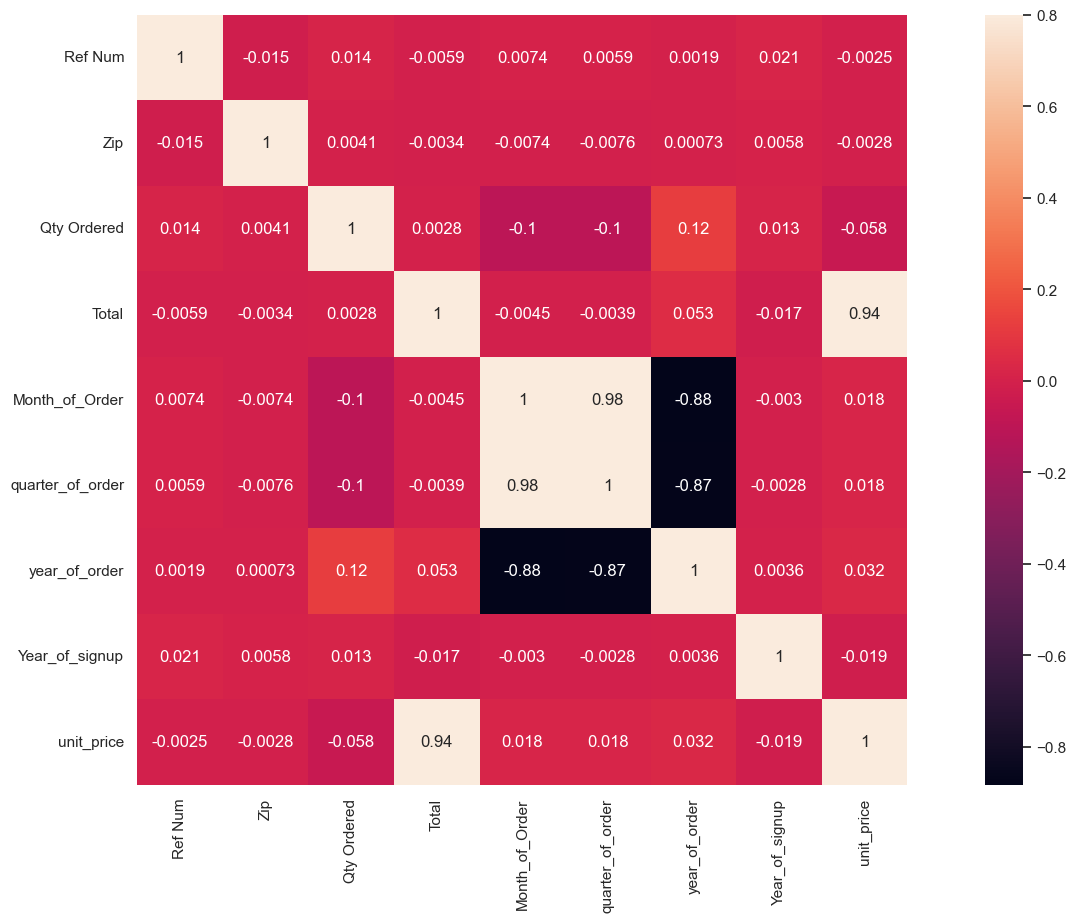

In [52]:
# Checking for correlation between features
a = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(a, vmax=0.8, square=True, annot=True);


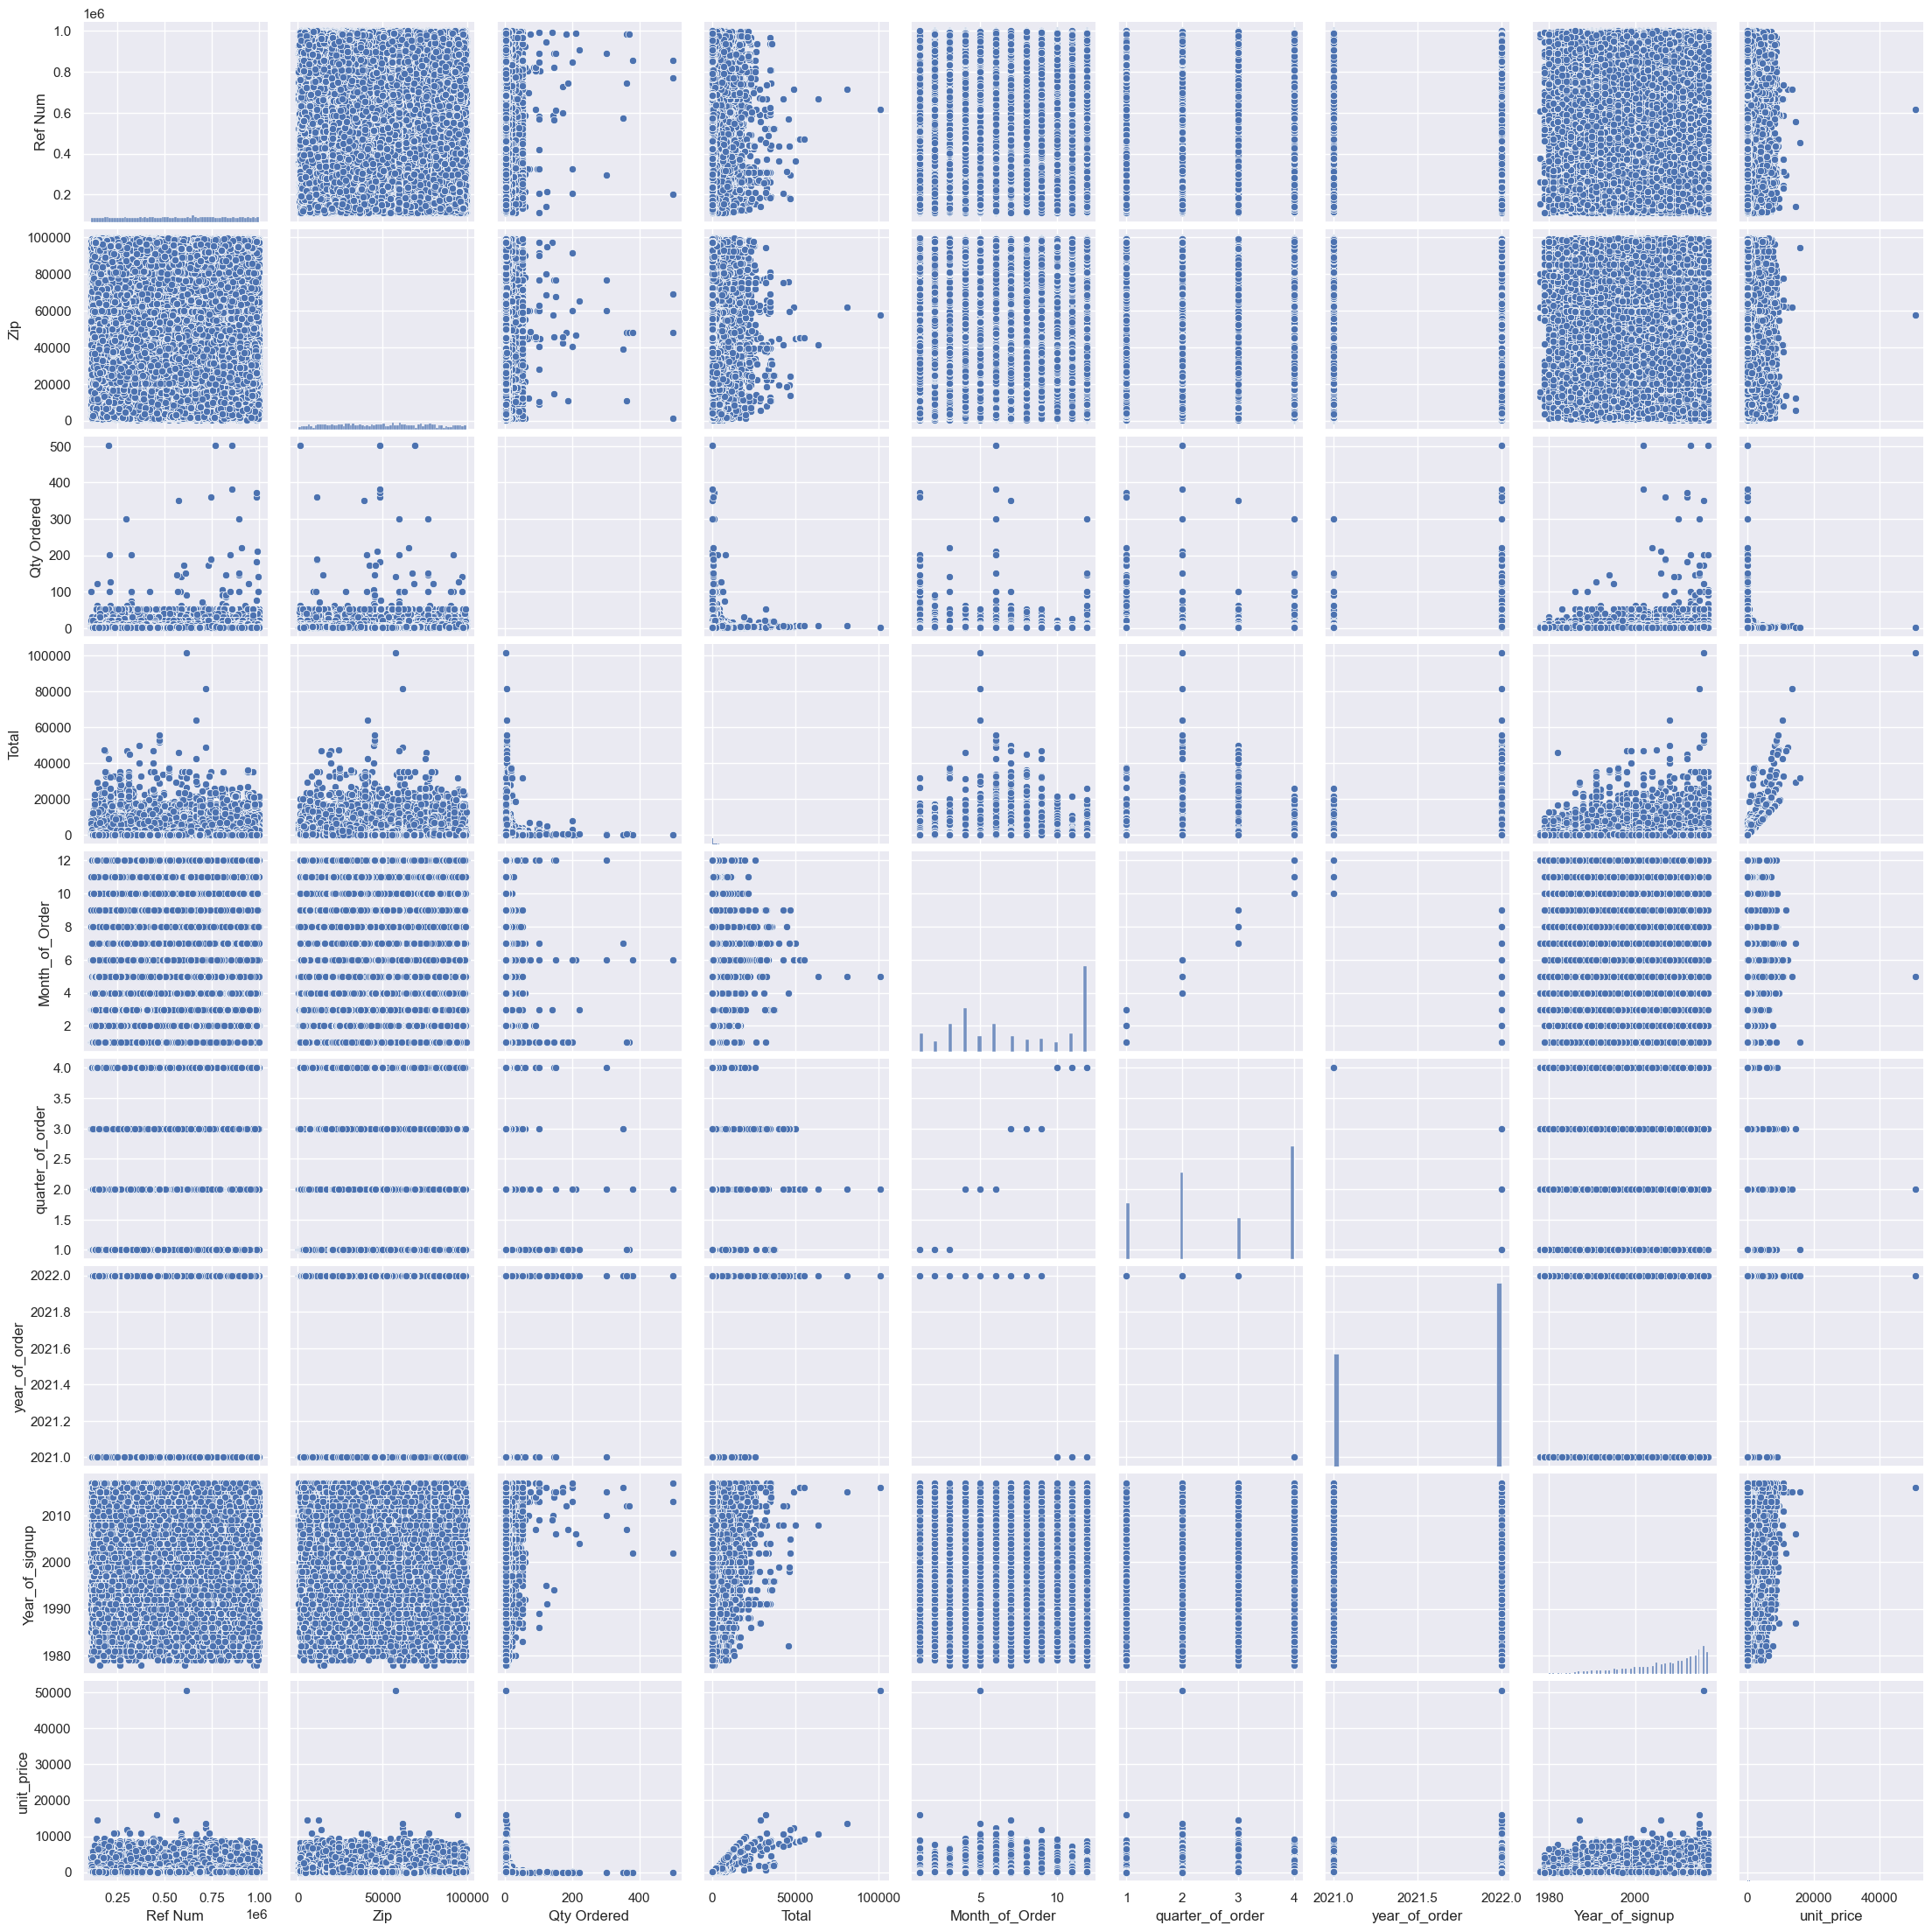

In [53]:

sns.pairplot(df);


## RECOMMENDATIONS

#### Based on the insights: 
Mobiles and tablets category, recorded the highest order with over 60,000 orders, which is about 21% of company's entire orders, while books category had the least order of about 0.28%. Texas, California,and New York are the states with the highest Customer Orders, while the states with the least orders include Rhode Island, Delaware and New Hampshire state. The percentage of transaction from the south is about 36.6%, followed by Midwest 26.7%, while the least is from the West 16.9%. The disparity between the female and male customers is not much, with 48% of them being Female and 51% of them being male.The company recorded its highest frequency of order in the month of December of over 81,000, followed by the month of April which recorded over 41,000 and least month is October. The great disparity in the frequency of order between December and other months may be due to the Christmas Celebration which comes up in the month of December.  

Over one-third of the payment method comes from Cash on delivery, and only a very few of the customers use cash at doorstep and financial settlement method. Over 50% of the customers(newbie) started shopping with the company about 10years ago, while only less than 5% of the customers still place orders from the company for the pass 39years. Winter Season records the highest customers, about 38.4% followed by Spring, this correlated with the high orders seen in the month of December. 2016 and 2015 year of signup, recorded the highest total amount generated by the company. 2016 and 2015 also recorded the year with the highest quantity of items bought by customer. 

Mobile phones and tablets accounts for almost 80% of the total amount generated in the data set; this is despite significant quantity purchases in other categories such as; Applicances, Beauty and Grooming, Superstore, Mens fashion and others. The ratio of items purchased to total amount generated in each category should be analysed. For example the Superstore category has an adequate quantity purchase of almost 100,000 however the amount generated from these purchases is less than 20,000 dollars. Since there is disparity in terms of quantity purchased and value generated, Sterling E-commerce should seek efficent means in generating value from other categories, for example black friday sales, promos, holiday theme sales e.t.c. 

Customer who order via easypay-vouchers do not contribute to quantity ordered, however the total amount generated from this payment method is highly significant. While the opposite applies to the COD method of payment; high contribution in terms of quantity but not in terms of total amount generated. This payment methods can be used to analyse the purchasing power of the type of customers who use such payment methods. The dataset shows that during the winter period, the quantity order is high however the amount generated was low for that season. Sterling E-commence need to investigate why there is a disparity between quantity ordered and revenue generated in winter.